# Support Vector Machine

[https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)

### Bibliotecas e Carregamento

In [31]:
import io
import requests

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#### Download e carregamento

In [143]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'

resp = requests.get(url)

if resp.ok:
    data = resp.content
    data = data.decode('utf8')
    
    df = pd.read_csv(io.StringIO(data), engine='python')

#### Head

In [144]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


#### Info

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Pré-processamento
#### Get dummies `class`
 - `drop_first=True`

In [147]:
pd.get_dummies(df['class'])

,Negative,Positive
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
515,0,1
516,0,1
517,0,1
518,1,0


#### Get dummies de todos os atributos não numéricos

In [249]:
for c in df.columns[1:]:
    df[c] = pd.get_dummies(df[c], drop_first=True)

#### Head 10

In [ ]:
df.head(10)

## Avaliação gráfica

#### Heatmap da correlação

<AxesSubplot:>

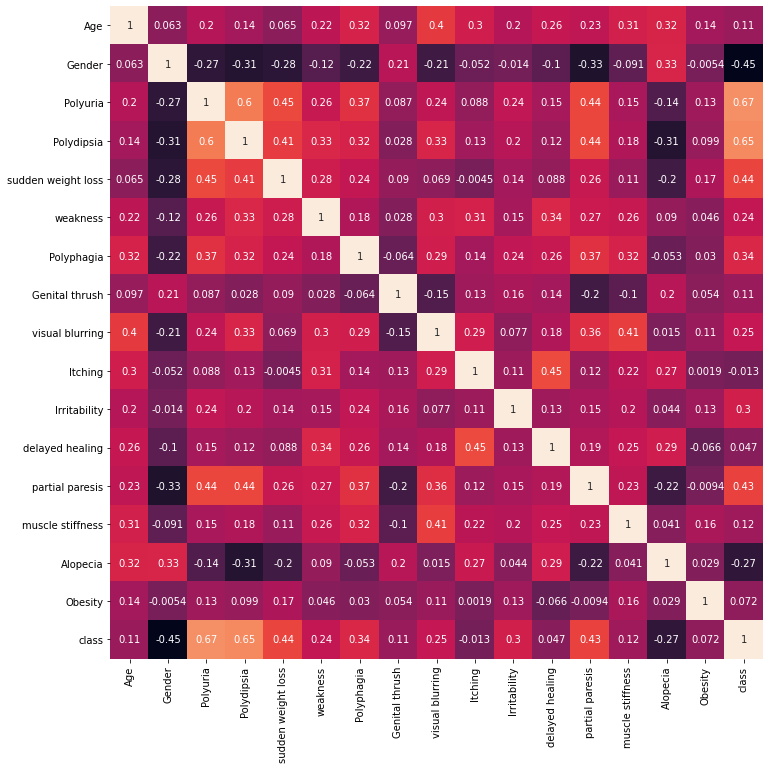

In [64]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, cbar=False) 

#### Jointplot: `Polyuria` x `Polydipsia` x `class`

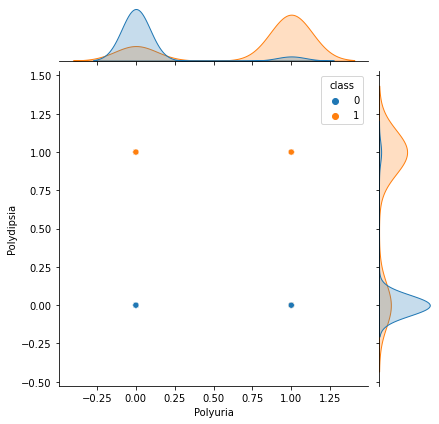

In [72]:
sns.jointplot(x='Polyuria', y='Polydipsia', data=df, hue='class')

#### Criar colina `p2`

Atributo `Polyuria` adicionado de erro

```py
np.random.normal(0,100,df.shape[0])
np.random.randn(df.shape[0])
```

In [ ]:
df['Polyuria_2'] = df['Polyuria'] + (10*np.random.randn(df.shape[0]))

#### Jointplot: `p2` x `Polydipsia` x `class`

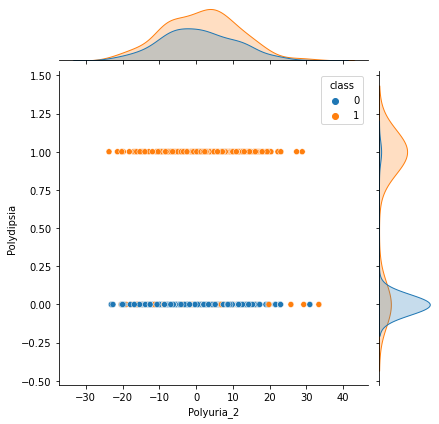

In [267]:
sns.jointplot(x='Polyuria_2', y='Polydipsia', data=df, hue='class')

#### Countplot `classes`

<AxesSubplot:xlabel='class', ylabel='count'>

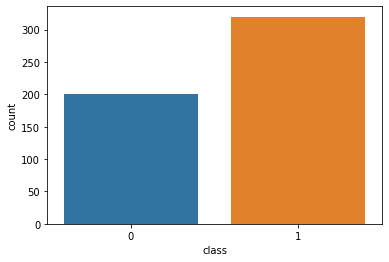

In [157]:
sns.countplot(data=df, x='class')

#### Histogram `Age`

```py
_ = plt.xticks(range(0, 90, 2))
```

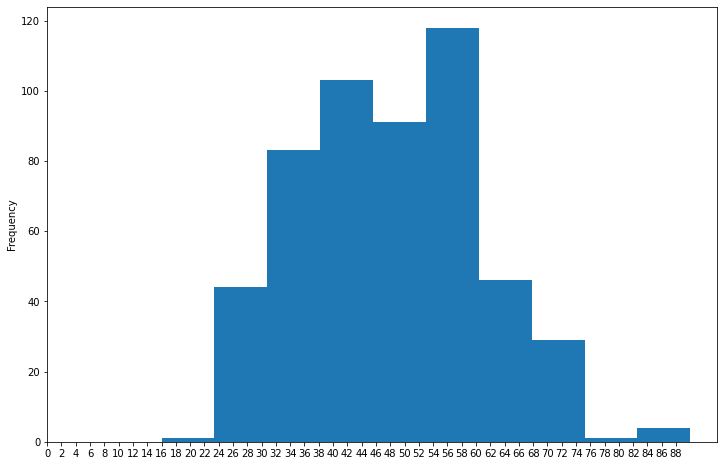

In [170]:
plt.figure(figsize=(12, 8))
df['Age'].plot.hist()
_ = plt.xticks(range(0, 90, 2))

#### Groupby `class` $\rightarrow$ Histograma `Age`
 - `bins=30`
 - `alpha=0.8`
 - `legend=True`

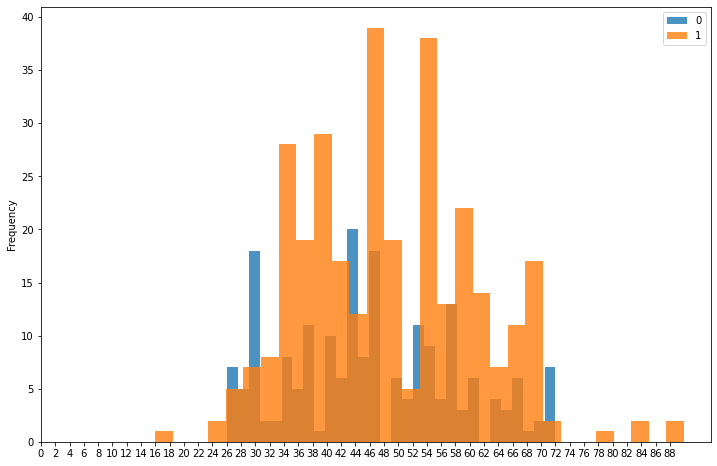

In [269]:
plt.figure(figsize=(12, 8))
df.groupby(by='class')['Age'].plot.hist(by='Age', bins=30, alpha=0.8, legend=True)
_ = plt.xticks(range(0, 90, 2))

## Split dos dados

```py
from sklearn.model_selection import train_test_split
```

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [224]:
X = df[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]
y = df['class']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Criando um modelo

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [226]:
from sklearn.svm import SVC

In [227]:
clf = SVC()

In [228]:
clf.fit(X_train, y_train)

SVC()

## Predição

In [229]:
y_hat = clf.predict(X_test)

### Qualidade do modelo

In [230]:
from sklearn.metrics import classification_report, confusion_matrix

In [232]:
print(classification_report(y_hat, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77       156

    accuracy                           0.63       156
   macro avg       0.50      0.31      0.39       156
weighted avg       1.00      0.63      0.77       156



#### Matriz de confusão 

In [233]:
confusion_matrix(y_hat, y_test)

array([[ 0,  0],
       [58, 98]])

## GridSearch

In [234]:
from sklearn.model_selection import GridSearchCV

#### Dicionário de parâmetros

```py
param_grid={}
```

In [236]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001]
}

#### Instanciando a busca
 - `refit=True`
 - `verbose=True`

In [274]:
gcv = GridSearchCV(SVC(), params, refit=True, verbose=True)

#### Treinamento

In [276]:
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=True)

### Predição

In [239]:
y_hat_gcv = gcv.predict(X_test)

In [240]:
print(classification_report(y_hat_gcv, y_test))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        56
           1       0.98      0.96      0.97       100

    accuracy                           0.96       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.96      0.96      0.96       156



### Melhor classificador
 - `best_estimator_`

In [248]:
gcv.best_estimator_

SVC(C=100, gamma=0.1)